In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import impt
import jax
import fitsio
import numpy as np
import jax.numpy as jnp
from fpfs import pltutil
import astropy.io.ascii as pyascii
import matplotlib.pylab as plt
import pandas as pd

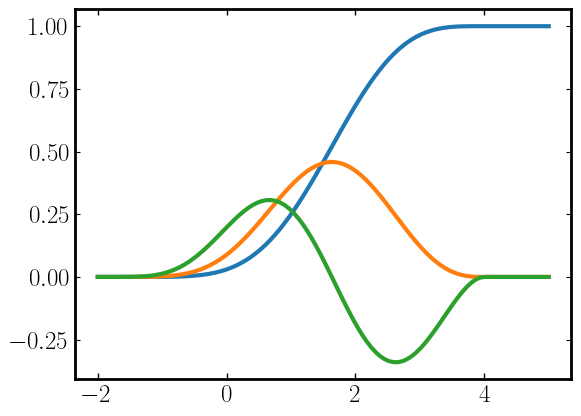

In [94]:
x = jnp.linspace(-2,5,100)
func = lambda a:  (impt.fpfs.utils.ssfunc3(a, mu = 1., sigma = 3.))**2. #* jnp.exp(-(a-1)**2./8)
dfunc = jax.grad(func)
ddfunc =  jax.grad(dfunc)
dy1 = jax.lax.map(dfunc,x)
y2 = jax.lax.map(func,x)
dy2 = jax.lax.map(dfunc,x)
ddy2 = jax.lax.map(ddfunc,x)


plt.close()
#plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, dy2)
plt.plot(x, ddy2)

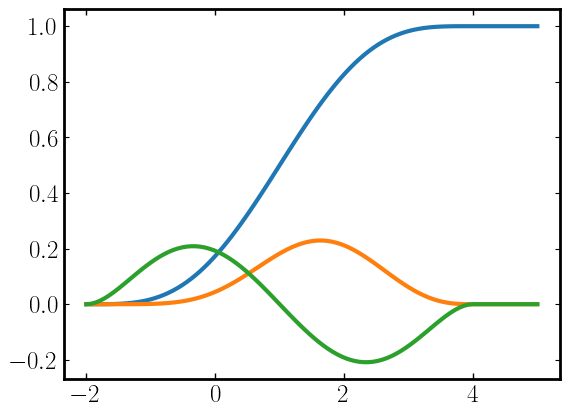

In [96]:
x = jnp.linspace(-2,5,100)
func = lambda a:  (impt.fpfs.utils.ssfunc3(a, mu = 1., sigma = 3.)) #* jnp.exp(-(a-1)**2./8)
dfunc = jax.grad(func) 
ddfunc =  jax.grad(dfunc)
dy1 = jax.lax.map(dfunc,x)
y2 = jax.lax.map(func,x)
dy2 = jax.lax.map(dfunc,x)
ddy2 = jax.lax.map(ddfunc,x)


plt.close()
#plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, dy2*y2)
plt.plot(x, ddy2)

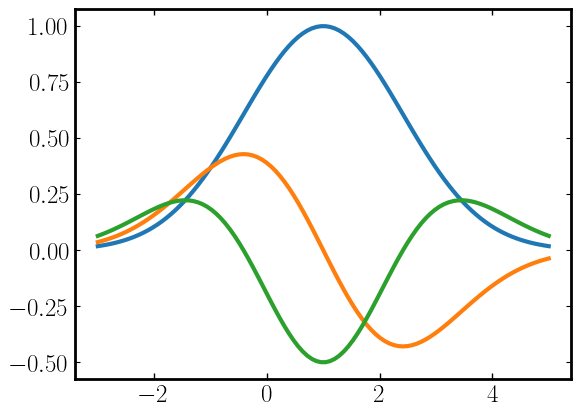

In [91]:
x = jnp.linspace(-3,5,100)
func = lambda a:  jnp.exp(-(a-1)**2./4) #* 1 / (a+4) #* impt.fpfs.utils.ssfunc3(a, mu = 0.5, sigma = 2.) 
dfunc = jax.grad(func)
ddfunc =  jax.grad(dfunc)
dy1 = jax.lax.map(dfunc,x)
y2 = jax.lax.map(func,x)
dy2 = jax.lax.map(dfunc,x)
ddy2 = jax.lax.map(ddfunc,x)


plt.close()
#plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, dy2)
plt.plot(x, ddy2)

In [101]:
mm = 27.5
ii = 0
fname = './sum_n1_basic1/try1_bin_%.1f_run%d.fits' %(mm,ii)
dd = fitsio.read(fname)

In [102]:
dd.shape

(500, 4, 1)

In [106]:
errm.shape

(4, 1)

In [107]:
errm

array([[0.00261187],
       [0.00261187],
       [0.00261187],
       [0.00261187]])

In [108]:
outs.shape

(5000, 4, 1)

[[0.0008846  0.00088293 0.00089573 0.00095442]]
Separate galaxies into 4 bins: [27.5 27.  26.5 26. ]
Multiplicative biases for those bins are:  [4.88086408e-04 3.31776061e-04 3.33594621e-05 2.14606904e-04]
Errors are:  [[0.0008846  0.00088293 0.00089573 0.00095442]]
Additive biases for those bins are:  [-8.38155432e-06 -1.06584251e-05 -7.85163677e-06 -3.46161439e-06]
Errors are:  [[1.06697282e-05 1.03996126e-05 9.52395789e-06 8.73257482e-06]]
(500, 3, 4)
[17.52316561 17.24620031 15.97088803 12.53177007]
binave
------
  27.5
  27.0
  26.5
  26.0


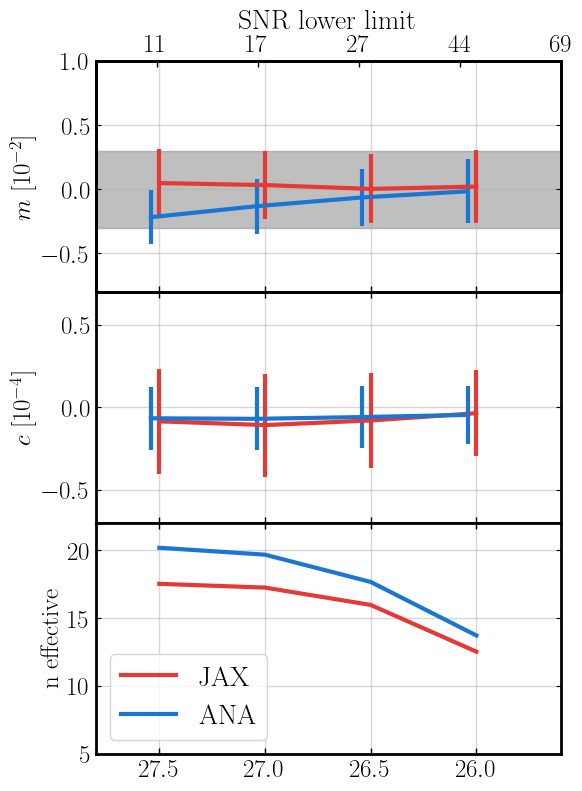

In [165]:
plt.close()
fig,axes= plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6,9))
#pltutil.make_figure_axes(ny=2,nx=1,square=False)

shear_value = 0.02
#maglist = [26.5, 26, 25.5, 25.0, 24.5, 24.]
maglist = [27.5, 27.0, 26.5, 26.0]
res = np.zeros((4, len(maglist)))
errm = np.zeros((1, len(maglist)))
errc = np.zeros((1, len(maglist)))
nsims = np.zeros(len(maglist))
for im,mm in enumerate(maglist):
    outs=[]
    for ii in range(0,10):
        fname = './sum_n1_basic1/try1_bin_%.1f_run%d.fits' %(mm,ii)
        if os.path.isfile(fname):
            dd = fitsio.read(fname)
            outs.append(dd)
    outs = np.vstack(outs)
    nsims[im] = outs.shape[0]
    res[:,im] = np.average(outs, axis=0)[:,0]
    errm[0,im] = np.std(outs[:,1,0]/outs[:,3,0], axis=0)
    errc[0,im] = np.std(outs[:,2,0]/outs[:,3,0], axis=0)
    
mbias = (res[1] / res[3] / 2.0 - shear_value) / shear_value
merr =  errm / 2.0 / shear_value / np.sqrt(nsims)
cbias = res[2] / res[3]
cerr = errc / np.sqrt(nsims)
print(merr)

print("Separate galaxies into %d bins: %s" % (len(res[0]), res[0]))
print("Multiplicative biases for those bins are: ", mbias)
print("Errors are: ", merr)
print("Additive biases for those bins are: ", cbias)
print("Errors are: ", cerr)
    
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit'

ax.errorbar(res[0],mbias*1e2,merr*1e2*3.,color=pltutil.colors[2], label='JAX')

ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(25.6,27.8)
ax.set_ylim(-0.8,1.)
ax.set_xticks((27.5, 27, 26.5, 26, 25.5))

ax.invert_xaxis()
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.5)
ax.grid()
axb = ax.twiny()
axb.set_xlim(25.6,27.8)
axb.set_xticks((27.5, 27, 26.5, 26, 25.5))
axb.set_xticklabels(('11', '17', '27', '44', '69'))
axb.set_xlabel('SNR lower limit')
axb.invert_xaxis()

ax=axes[1]
ax.errorbar(res[0],cbias*1e4,cerr*1e4*3.,color=pltutil.colors[2], label='JAX')
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(25.6,27.8)
ax.set_ylim(-0.7,0.7)
ax.set_xlabel(xlabel,fontsize=18)
ax.grid()


ax=axes[2]

outs = []
for ii in range(1):
    fname = './sum_n1_basic1/try1_bin_neff_run%d.fits' %ii
    dd = fitsio.read(fname)
    outs.append(dd)
outs = np.vstack(outs)
print(outs.shape)
res = np.average(outs, axis=0)
cerr = np.std(outs[:,1, :]/outs[:,2,:], axis=0)
cerr=(0.26/(np.sqrt((0.2*7100/60/2.)**2.*np.pi)*cerr))**2.
print(cerr)

x=res[0] 
y=cerr
ax.plot(np.array(x),np.array(y),color=pltutil.colors[2], label='JAX')
ax.set_ylabel('n effective',fontsize=18)
ax.set_ylim(5,22.)
ax.grid()

if True:
    # read data
    outs = pyascii.read('sum_n1_basic1/try1_bin_M00.csv')
    msk = outs['binave']>25.5
    x=outs['binave'][msk]
    y1=outs['mbias'][msk]
    yerr=outs['merr'][msk]
    z1=outs['cbias'][msk]
    zerr=outs['cerr'][msk]
    ax=axes[0]
    ax.errorbar(np.array(x)+0.04,np.array(y1)*1e2,np.array(yerr)*1e2*3.,label='ANA',color=pltutil.colors[1])
    ax=axes[1]
    ax.errorbar(np.array(x)+0.04,np.array(z1)*1e4,np.array(zerr)*1e4*3., label='ANA',color=pltutil.colors[1])
    
    
    ax=axes[2]
    outs = pyascii.read('sum_n1_basic1/try1_bin_M00_neff.csv')
    x=outs['binave']
    y=outs['cerr']
    y=(0.26/(np.sqrt((0.2*7100/60/2.)**2.*np.pi)*y))**2.
    print(x)
    xlabel=r'$m_{\rm F}$ upper limit'
    ax.plot(np.array(x),np.array(y),color=pltutil.colors[1], label='ANA')
ax.legend()
ax.invert_xaxis()
fig.subplots_adjust(hspace=0)
fig.show()

(500, 3, 4)
[17.52316561 17.24620031 15.97088803 12.53177007]


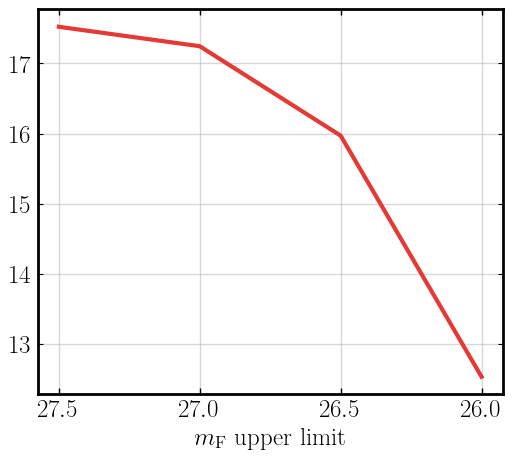

In [169]:
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=1,nx=1,square=False)


if False:
    ## read data
    outs = pyascii.read('sum_n1_basic1/try1_bin_M00_neff.csv')
    x=outs['binave']
    y=outs['cerr']
    print(y)

    y=(0.30/(np.sqrt((0.2*7100/60/2.)**2.*np.pi)*y))**2.

    ax=axes[0]
    xlabel=r'$m_{\rm F}$ upper limit'
    ax.plot(np.array(x),np.array(y),label=r'$0.5$ arcsec',color=pltutil.colors[1])


outs = []
for ii in range(1):
    fname = './sum_n1_basic1/try1_bin_neff_run%d.fits' %ii
    dd = fitsio.read(fname)
    outs.append(dd)
outs = np.vstack(outs)
print(outs.shape)


res = np.average(outs, axis=0)
cerr = np.std(outs[:,1, :]/outs[:,2,:], axis=0)
cerr=(0.26/(np.sqrt((0.2*7100/60/2.)**2.*np.pi)*cerr))**2.
print(cerr)



ax.legend()
ax.set_ylabel('n effective',fontsize=18)
ax.set_xlim(22.6,26.6)

x=res[0]
y=cerr
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit'
ax.plot(np.array(x),np.array(y),color=pltutil.colors[2])

ax.set_xlabel(xlabel,fontsize=18)
ax.grid()
ax.invert_xaxis()
plt.show()

In [60]:
h=pyfits.getdata('cat_n1_basic1/cov_matrix.fits')
for imag in [27.5, 27, 26.5,26,25.5,25,24.5, 24.]:
    print(10 ** (( 30.- imag) / 2.5)/np.sqrt(a[0,0]))
    #print(10 ** (( 30.- imag) / 2.5))

12.027845563990123
19.062850554341544
30.212582072479474
47.88371565334542
75.8905749687308
120.27845563990122
190.62850554341557
302.1258207247948


In [166]:

print(10 ** (( 30.- 27) / 2.5))

15.848931924611133


In [168]:
np.sqrt(7e-3)*15

1.2549900398011133

In [18]:
for i in range(31):
    print(np.sqrt(a[i,i]))

0.8314040903500424
1.6267121188069564
1.0769006713005966
1.0768671560789613
2.878795046594358
1.954290973979016
1.9540790251071485
0.5290585597350104
0.5290591824353524
0.5290585597350107
0.5290591824353524
0.5290585597350104
0.5290591824353524
0.5290585597350107
0.5290591824353524
1.517166992522063
1.5137399550146442
1.5171669925220632
1.5137399550146442
1.517166992522063
1.5137399550146442
1.5171669925220632
1.5137399550146442
1.5135286499574403
1.5169664832131693
1.5135286499574403
1.5169664832131695
1.5135286499574403
1.5169664832131695
1.51352864995744
1.5169664832131693


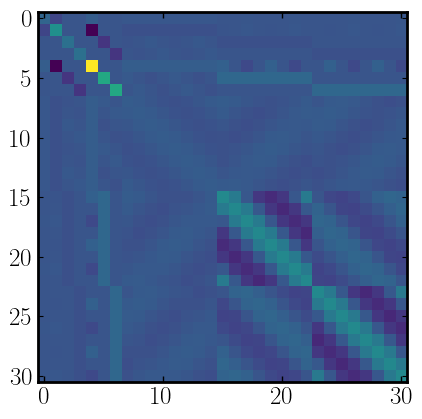

In [82]:
plt.imshow(a)

In [33]:
2.5*0.22

0.55

In [34]:
1.5/0.6

2.5

In [61]:
2.5*1.5

3.75